In [6]:
import pandas as pd
import numpy as np

In [7]:
df_x = pd.read_csv("./Data/linearX.csv", header=None)
df_y = pd.read_csv("./Data/linearY.csv", header=None)

In [8]:
x_data_raw = np.array(df_x[0].to_list())
y_data = np.array(df_y[0].to_list())

In [9]:
# Normalise x_data_raw
x_data_original = (x_data_raw - np.mean(x_data_raw))/np.std(x_data_raw)

In [10]:
x_data = np.column_stack((x_data_original, np.ones(len(x_data_original))))

In [11]:

J_theta_old = 0
J_theta_new = 1e5
threshold = 1e-17
eta = 0.01
theta_initial = np.zeros(2)
while abs(J_theta_new-J_theta_old) > threshold:
    
    J_theta = 0
    m = len(x_data)
    for x,y in zip(x_data,y_data):
        J_theta += (y - np.sum(x * theta_initial))**2
    J_theta = J_theta/(2*m)
    
    J_theta_old = J_theta_new
    J_theta_new = J_theta   
    
    theta_initial = theta_initial - eta * (1/m) * np.dot((np.dot(x_data, theta_initial) - y_data) , x_data)
    print(f"J_theta: {J_theta}, Difference: {abs(J_theta_new-J_theta_old)}, Parameters:{theta_initial}")
    

J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[1.34019602e-05 9.96620100e-03]
J_theta: 0.48674503318699885, Difference: 0.009882871527501502, Parameters:[2.66699008e-05 1.98327400e-02]
J_theta: 0.47705883080289474, Difference: 0.009686202384104114, Parameters:[3.98051619e-05 2.96006136e-02]
J_theta: 0.4675653838462344, Difference: 0.009493446956660323, Parameters:[5.28090705e-05 3.92708085e-02]
J_theta: 0.45826085648401155, Difference: 0.00930452736222287, Parameters:[6.56829400e-05 4.88443014e-02]
J_theta: 0.4491414892162969, Difference: 0.009119367267714673, Parameters:[7.84280708e-05 5.83220594e-02]
J_theta: 0.4402035973572099, Difference: 0.008937891859087, Parameters:[9.10457503e-05 6.77050398e-02]
J_theta: 0.4314435695461187, Difference: 0.008760027811091198, Parameters:[0.00010354 0.07699419]
J_theta: 0.4228578662884679, Difference: 0.00858570325765079, Parameters:[0.0001159  0.08619045]
J_theta: 0.41444301852564464, Difference: 0.008414847762823252, Pa

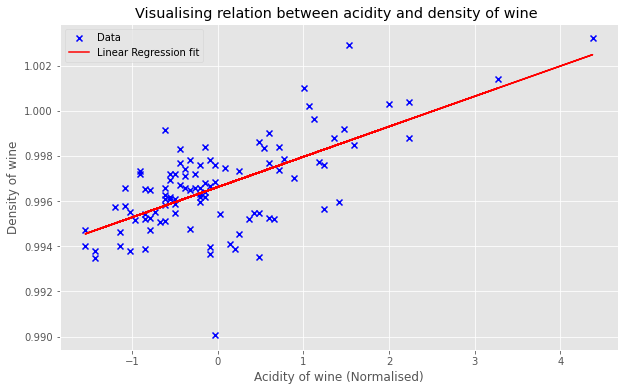

In [12]:
#Plot this data and linear regression output
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.scatter(x_data_original, y_data, label='Data', color='blue', marker='x')
regression = x_data_original * theta_initial[0] + theta_initial[1]
plt.plot(x_data_original, regression, label='Linear Regression fit', color='red')

plt.xlabel("Acidity of wine (Normalised)")
plt.ylabel("Density of wine")
plt.title("Visualising relation between acidity and density of wine ") 
plt.legend()
plt.savefig('LinearGraphs/linear_visualised.png', dpi=300, bbox_inches='tight')
plt.show()



In [13]:
theta_0 = np.linspace(-2, 2, 200)  # Adjust the range as needed
theta_1 = np.linspace(-2, 2, 200)  # Adjust the range as needed
# X, Y = np.meshgrid(theta_0, theta_1)
# Z = np.zeros_like(X)
Z = np.zeros((len(theta_0),len(theta_1)))

m = len(x_data)
for i,t0 in enumerate(theta_0):
    for j,t1 in enumerate(theta_1):
        theta_temp = [t0, t1]
        for x, y in zip(x_data, y_data):
            Z[j, i] += (y - np.sum(x * theta_temp)) ** 2
        Z[j, i] = Z[j, i] / (2 * m)




In [14]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Z, x=theta_0, y=theta_1)])
fig.update_layout(
    title='3-dimensional mesh showing the error function (J(θ))',
    scene=dict(xaxis_title='Theta X', yaxis_title='Theta Y', zaxis_title='J(theta)')
)

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)

fig.write_html('3d_cost_function_plot.html')


In [15]:

J_theta_old = 0
J_theta_new = 1e5
threshold = 1e-17
eta = 0.01
theta_initial = np.zeros(2)

animation_data = []

while abs(J_theta_new-J_theta_old) > threshold:
    
    J_theta = 0
    m = len(x_data)
    for x,y in zip(x_data,y_data):
        J_theta += (y - np.sum(x * theta_initial))**2
    J_theta = J_theta/(2*m)
    
    J_theta_old = J_theta_new
    J_theta_new = J_theta   
    
    animation_data.append((J_theta, theta_initial[0],theta_initial[1]))
    
    theta_initial = theta_initial - eta * (1/m) * np.dot((np.dot(x_data, theta_initial) - y_data) , x_data)
    print(f"J_theta: {J_theta}, Difference: {abs(J_theta_new-J_theta_old)}, Parameters:{theta_initial}")
    

J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[1.34019602e-05 9.96620100e-03]
J_theta: 0.48674503318699885, Difference: 0.009882871527501502, Parameters:[2.66699008e-05 1.98327400e-02]
J_theta: 0.47705883080289474, Difference: 0.009686202384104114, Parameters:[3.98051619e-05 2.96006136e-02]
J_theta: 0.4675653838462344, Difference: 0.009493446956660323, Parameters:[5.28090705e-05 3.92708085e-02]
J_theta: 0.45826085648401155, Difference: 0.00930452736222287, Parameters:[6.56829400e-05 4.88443014e-02]
J_theta: 0.4491414892162969, Difference: 0.009119367267714673, Parameters:[7.84280708e-05 5.83220594e-02]
J_theta: 0.4402035973572099, Difference: 0.008937891859087, Parameters:[9.10457503e-05 6.77050398e-02]
J_theta: 0.4314435695461187, Difference: 0.008760027811091198, Parameters:[0.00010354 0.07699419]
J_theta: 0.4228578662884679, Difference: 0.00858570325765079, Parameters:[0.0001159  0.08619045]
J_theta: 0.41444301852564464, Difference: 0.008414847762823252, Pa

In [16]:
animation_data_subset = animation_data[0::20]

In [22]:



surface_plot = go.Surface(z=Z, x=theta_0, y=theta_1, name="Cost Function",
                          hidesurface=False                 
                        )



sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Loss:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

x_visible_range = [-2, 2]
y_visible_range = [-2, 2]
z_visible_range = [0, 6]

scatter_frames = []
x_frame = []
y_frame = []
z_frame = []
for z,x,y in animation_data_subset:
    x_frame.append(x)
    y_frame.append(y)
    z_frame.append(z) 

    # scatter_frame = go.Figure()
    # scatter_frame.add_trace(surface_plot)
    # scatter_frame.add_trace(go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='blue')))
    
    scatter_frame = go.Frame(data=[go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='green'), name="Gradient Descent")]
                             ,name=str(z))
    # scatter_frame.update_layout(scene=dict(xaxis_range=x_visible_range, yaxis_range=y_visible_range, zaxis_range=z_visible_range))
    scatter_frame.update(
        layout={
                "xaxis": {"range": x_visible_range},
                "yaxis": {"range": y_visible_range},
            }
    )

    scatter_frames.append(scatter_frame)


    slider_step = {"args": [
        [z],
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": z,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)








animation_fig = go.Figure(data=[surface_plot,surface_plot],
                        layout=go.Layout(
                            xaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            yaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            title_text="3D Scatter Plot Animation with Surface", hovermode="closest",
                            updatemenus=[
                                    {
                                        "buttons": [
                                            {
                                                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                                                "fromcurrent": True, "transition": {"duration": 300,
                                                                                                    "easing": "quadratic-in-out"}}],
                                                "label": "Play",
                                                "method": "animate"
                                            },
                                            {
                                                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                                                "mode": "immediate",
                                                                "transition": {"duration": 0}}],
                                                "label": "Pause",
                                                "method": "animate"
                                            }
                                        ],
                                        "direction": "left",
                                        "pad": {"r": 10, "t": 87},
                                        "showactive": False,
                                        "type": "buttons",
                                        "x": 0.1,
                                        "xanchor": "right",
                                        "y": 0,
                                        "yanchor": "top"
                                    }
                                ],

                                sliders=[sliders_dict],
                                showlegend = True
                            ),
                              
                              
                          frames=scatter_frames)

animation_fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='3D Scatter Plot Animation with Surface',
)

animation_fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))


animation_fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)

# animation_fig.show()
animation_fig.write_html('3d_cost_function_animation_plot.html')


In [18]:
animation_fig.show()

In [19]:
surface_plot = go.Contour(z=Z, x=theta_0, y=theta_1, name="Cost Function")



sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Loss:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

x_visible_range = [-2, 2]
y_visible_range = [-2, 2]
z_visible_range = [0, 6]

scatter_frames = []
x_frame = []
y_frame = []
z_frame = []
for z,x,y in animation_data_subset:
    x_frame.append(x)
    y_frame.append(y)
    z_frame.append(z) 

    # scatter_frame = go.Figure()
    # scatter_frame.add_trace(surface_plot)
    # scatter_frame.add_trace(go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='blue')))
    
    scatter_frame = go.Frame(data=[go.Contour(z=Z, x=theta_0, y=theta_1, name="Cost Function"),go.Scatter(x=x_frame, y=y_frame, mode='markers', marker=dict(size=10, color='green'), name="Gradient Descent"),
                                   ]
                             ,name=str(z))
    # scatter_frame.update_layout(scene=dict(xaxis_range=x_visible_range, yaxis_range=y_visible_range, zaxis_range=z_visible_range))
    scatter_frame.update(
        layout={
                "xaxis": {"range": x_visible_range},
                "yaxis": {"range": y_visible_range},
            }
    )

    scatter_frames.append(scatter_frame)


    slider_step = {"args": [
        [z],
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": z,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)








animation_fig = go.Figure(data=[surface_plot,surface_plot],
                        layout=go.Layout(
                            xaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            yaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            title_text="Contour Plot Animation with Surface", hovermode="closest",
                            updatemenus=[
                                    {
                                        "buttons": [
                                            {
                                                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                                                "fromcurrent": True, "transition": {"duration": 300,
                                                                                                    "easing": "quadratic-in-out"}}],
                                                "label": "Play",
                                                "method": "animate"
                                            },
                                            {
                                                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                                                "mode": "immediate",
                                                                "transition": {"duration": 0}}],
                                                "label": "Pause",
                                                "method": "animate"
                                            }
                                        ],
                                        "direction": "left",
                                        "pad": {"r": 10, "t": 87},
                                        "showactive": False,
                                        "type": "buttons",
                                        "x": 0.1,
                                        "xanchor": "right",
                                        "y": 0,
                                        "yanchor": "top"
                                    }
                                ],

                                sliders=[sliders_dict],
                                showlegend = True
                            ),
                              
                              
                          frames=scatter_frames)

animation_fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='3D Scatter Plot Animation with Surface',
)

# animation_fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))

# animation_fig.show()
animation_fig.write_html('contour_animation.html')


In [52]:
theta_0 = np.linspace(-2, 2, 200)  # Adjust the range as needed
theta_1 = np.linspace(-2, 2, 200)  # Adjust the range as needed
X, Y = np.meshgrid(theta_0, theta_1)
# Z = np.zeros_like(X)
Z = np.zeros((len(theta_0),len(theta_1)))

m = len(x_data)
for i,t0 in enumerate(theta_0):
    for j,t1 in enumerate(theta_1):
        theta_temp = [t0, t1]
        for x, y in zip(x_data, y_data):
            Z[j, i] += (y - np.sum(x * theta_temp)) ** 2
        Z[j, i] = Z[j, i] / (2 * m)

MovieWriter imagemagick unavailable; using Pillow instead.


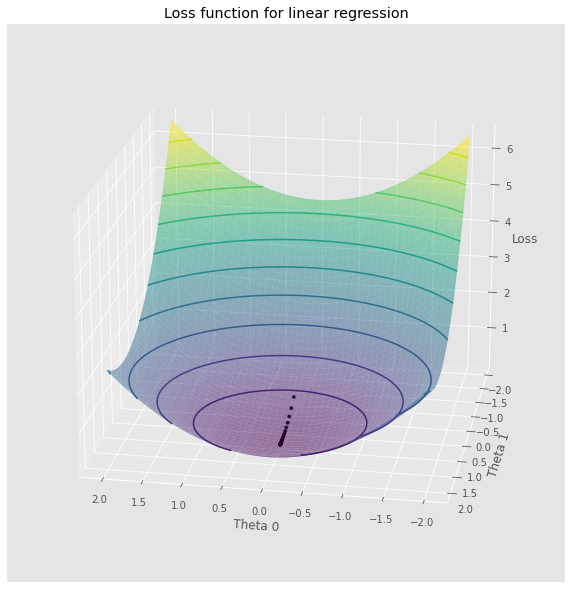

In [76]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm




fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(projection='3d')
# ax.view_init(60, 35)

# ax.view_init(elev=10., azim=2)

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none',label='Loss function')
ax.contour3D(X, Y, Z, 10, cmap=cm.viridis)

ax.view_init(elev=20., azim=110)

frame = ax.scatter([], [], [], marker="o", c="black",alpha=1,s=10,label='Gradient descent')

def animate(i):
    ax.view_init(elev=20., azim=80 + i/5)
    x_frame = []
    y_frame = []
    z_frame = []
    for z,x,y in animation_data_subset[:i]:
        x_frame.append(x)
        y_frame.append(y)
        z_frame.append(z) 
    frame._offsets3d = (x_frame, y_frame, z_frame)
    return frame

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
ax.set_zlabel('Loss')
plt.title('Loss function for linear regression')
# plt.legend(loc="upper left")

gif = FuncAnimation(fig, animate, frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
gif.save('plot.1.gif', dpi=90, writer='imagemagick')

plt.show()
